<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

pd.set_option('display.max_columns', None)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


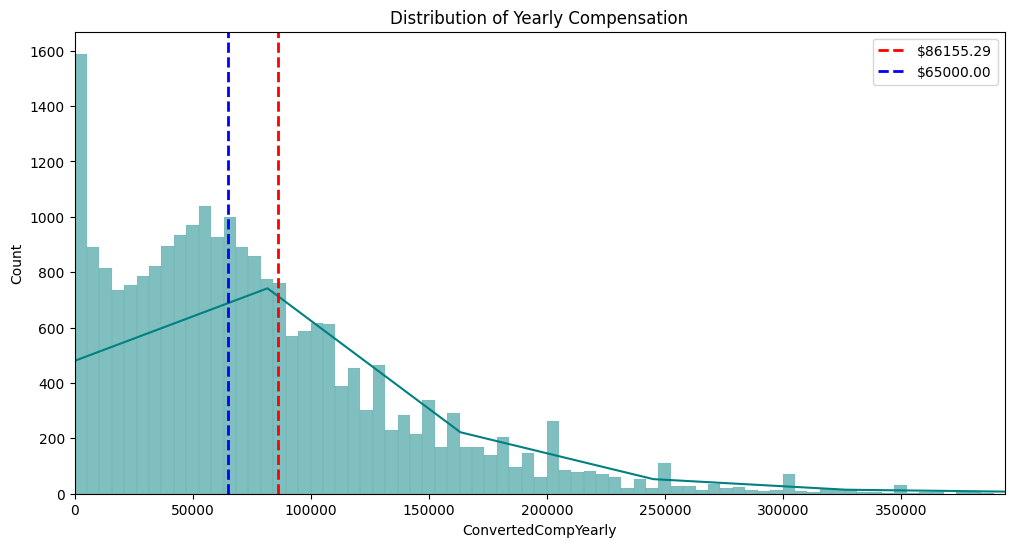

In [6]:
## Write your code here
# Remove null values
df = df.dropna(subset=["ConvertedCompYearly"])

# Plotting histogram
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='ConvertedCompYearly', kde=True, color='teal')
plt.title("Distribution of Yearly Compensation")

# Add a vertical line for mean and median value
mean = df["ConvertedCompYearly"].mean()
plt.axvline(mean, color='red', label=f'${mean:.2f}', linestyle='dashed', linewidth=2)

median = df["ConvertedCompYearly"].median()
plt.axvline(median, color='blue', label=f'${median:.2f}', linestyle='dashed', linewidth=2)

plt.legend()
# Limit x-axis to focus on the main distribution (e.g., up to 99th percentile)
upper_limit = df['ConvertedCompYearly'].quantile(0.99)
plt.xlim(0, upper_limit)

plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [9]:
## Write your code here
## Write your code here
full_time_employees = df[df["Employment"] == "Employed, full-time"]
median_full_time = full_time_employees["ConvertedCompYearly"].median()
print(f"Median compensation of full time employees (Yearly): ${median_full_time}")

Median compensation of full time employees (Yearly): $69814.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



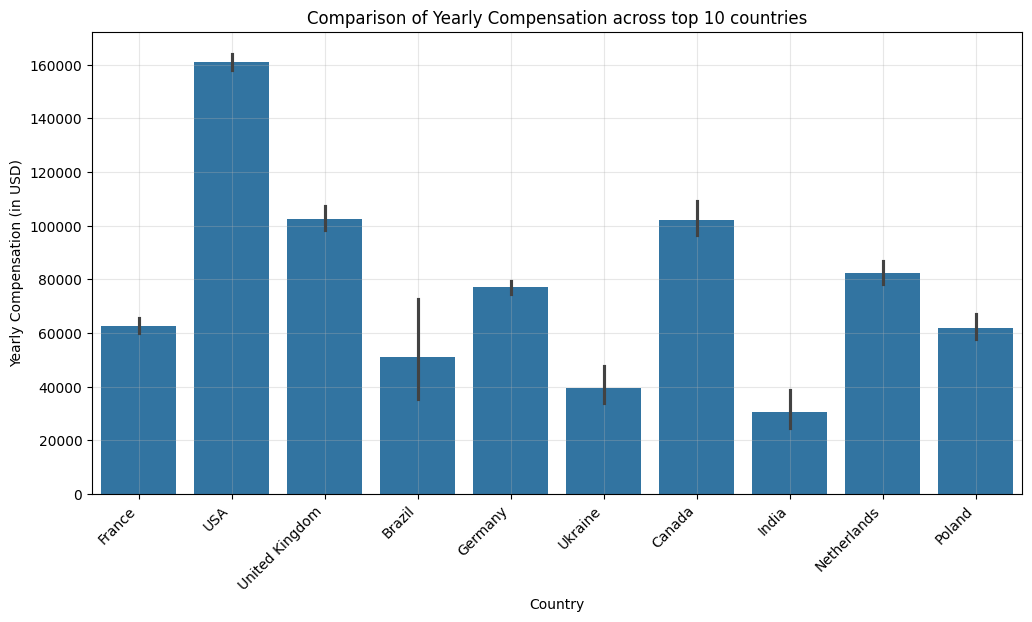

In [22]:
## Write your code here
map_country = {'United States of America': 'USA',
               'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'}
df["Country"] = df["Country"].replace(map_country)

top_10_countries = df["Country"].value_counts().head(10).index

df_top_10_countries = df[df["Country"].isin(top_10_countries)]

# Plot bar plot
plt.figure(figsize=(12,6))

sns.barplot(data=df_top_10_countries, x='Country', y='ConvertedCompYearly')
plt.grid(which='both', alpha=0.3)
plt.title("Comparison of Yearly Compensation across top 10 countries")
plt.xlabel("Country")
plt.ylabel("Yearly Compensation (in USD)")
plt.xticks(rotation=45, ha='right')

plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [ ]:
## Write your code here
# Q1 (25th percentile) and Q3 (75th percentile)
q1 = df["ConvertedCompYearly"].quantile(0.25)
q3 = df["ConvertedCompYearly"].quantile(0.75)

# InterQuartile Range
IQR = q3-q1

# Outlier bounds
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# Outliers
outlier = df[(df["ConvertedCompYearly"] < lower_bound) | (df["ConvertedCompYearly"] > upper_bound)]

# Dataframe without outliers
df_no_outliers = df[(df["ConvertedCompYearly"]>=lower_bound) & (df["ConvertedCompYearly"]<=upper_bound)]

print(f"Size of dataframe with outliers: {df.shape[0]}")
print(f"Size of dataframe without outliers: {df_no_outliers.shape[0]}")

Size of dataframe with outliers: 23435
Size of dataframe without outliers: 22457


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [24]:
## Write your code here
correlation_columns = ['ConvertedCompYearly','WorkExp', 'JobSatPoints_1']
df_corr = df_no_outliers[correlation_columns]

#Compute Correlation Matrix
correlation_matrix = df_corr.corr()
correlation_matrix

,ConvertedCompYearly,WorkExp,JobSatPoints_1
ConvertedCompYearly,1.000000,0.408438,-0.058170
WorkExp,0.408438,1.000000,-0.032388
JobSatPoints_1,-0.058170,-0.032388,1.000000


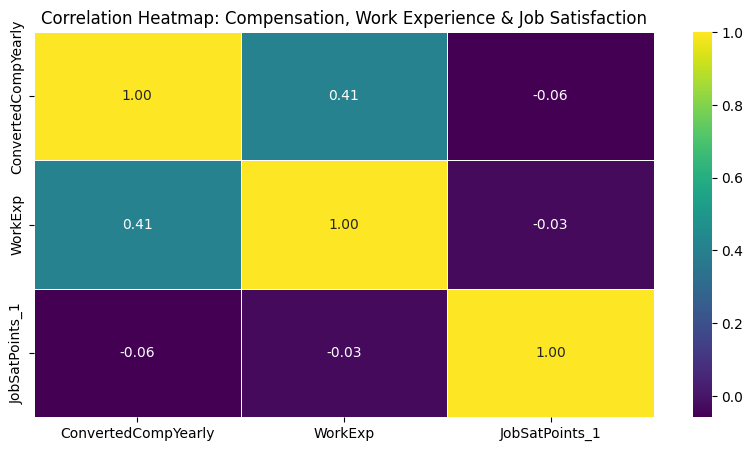

In [25]:
# Plot heatmap
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap='viridis')
plt.title("Correlation Heatmap: Compensation, Work Experience & Job Satisfaction")
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


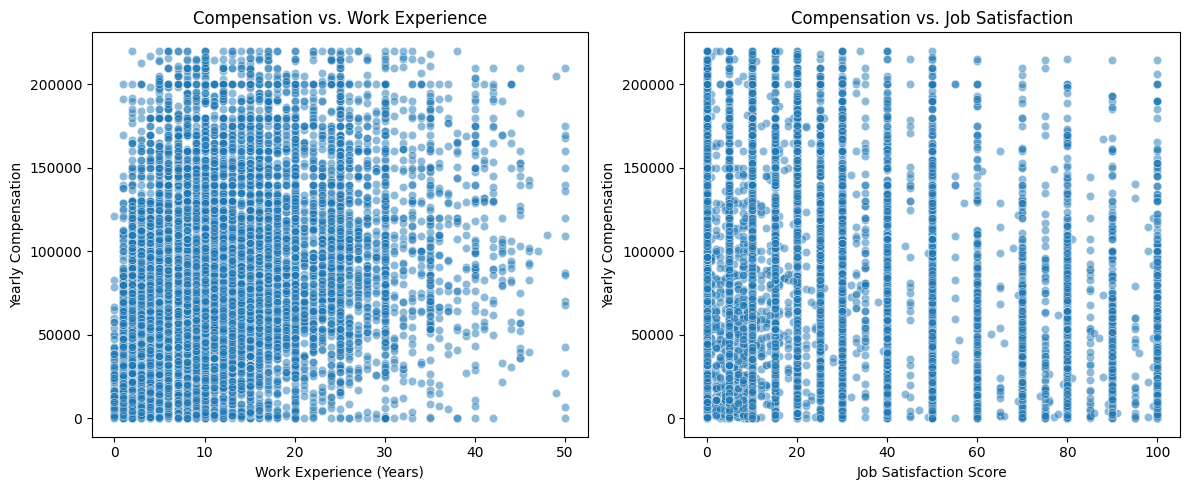

In [27]:
## Write your code here
# Set plot size
plt.figure(figsize=(12, 5))

# Scatter plot: Compensation vs. Work Experience
plt.subplot(1, 2, 1)  # Creates a subplot (1 row, 2 columns, 1st plot)
sns.scatterplot(data=df_no_outliers, x='WorkExp', y='ConvertedCompYearly', alpha=0.5)
plt.title("Compensation vs. Work Experience")
plt.xlabel("Work Experience (Years)")
plt.ylabel("Yearly Compensation")
#plt.yscale('log')  # Log scale to handle large salary variations

# Scatter plot: Compensation vs. Job Satisfaction
plt.subplot(1, 2, 2)  # 2nd subplot
sns.scatterplot(data=df_no_outliers, x='JobSatPoints_1', y='ConvertedCompYearly', alpha=0.5)
plt.title("Compensation vs. Job Satisfaction")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Yearly Compensation")
#plt.yscale('log')

# Show the plots
plt.tight_layout()  # Adjust layout for better readability
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
